## 1. Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

## 2. Data Overview

In [31]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [32]:
df.shape

(10000, 18)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [34]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## 3. Data Preprocessing

### Check for missing values

In [35]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### Drop unused columns

In [36]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [37]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

### Remove duplicates

In [38]:
df.duplicated().sum()

0

## 4. Exploratory Data Analysis

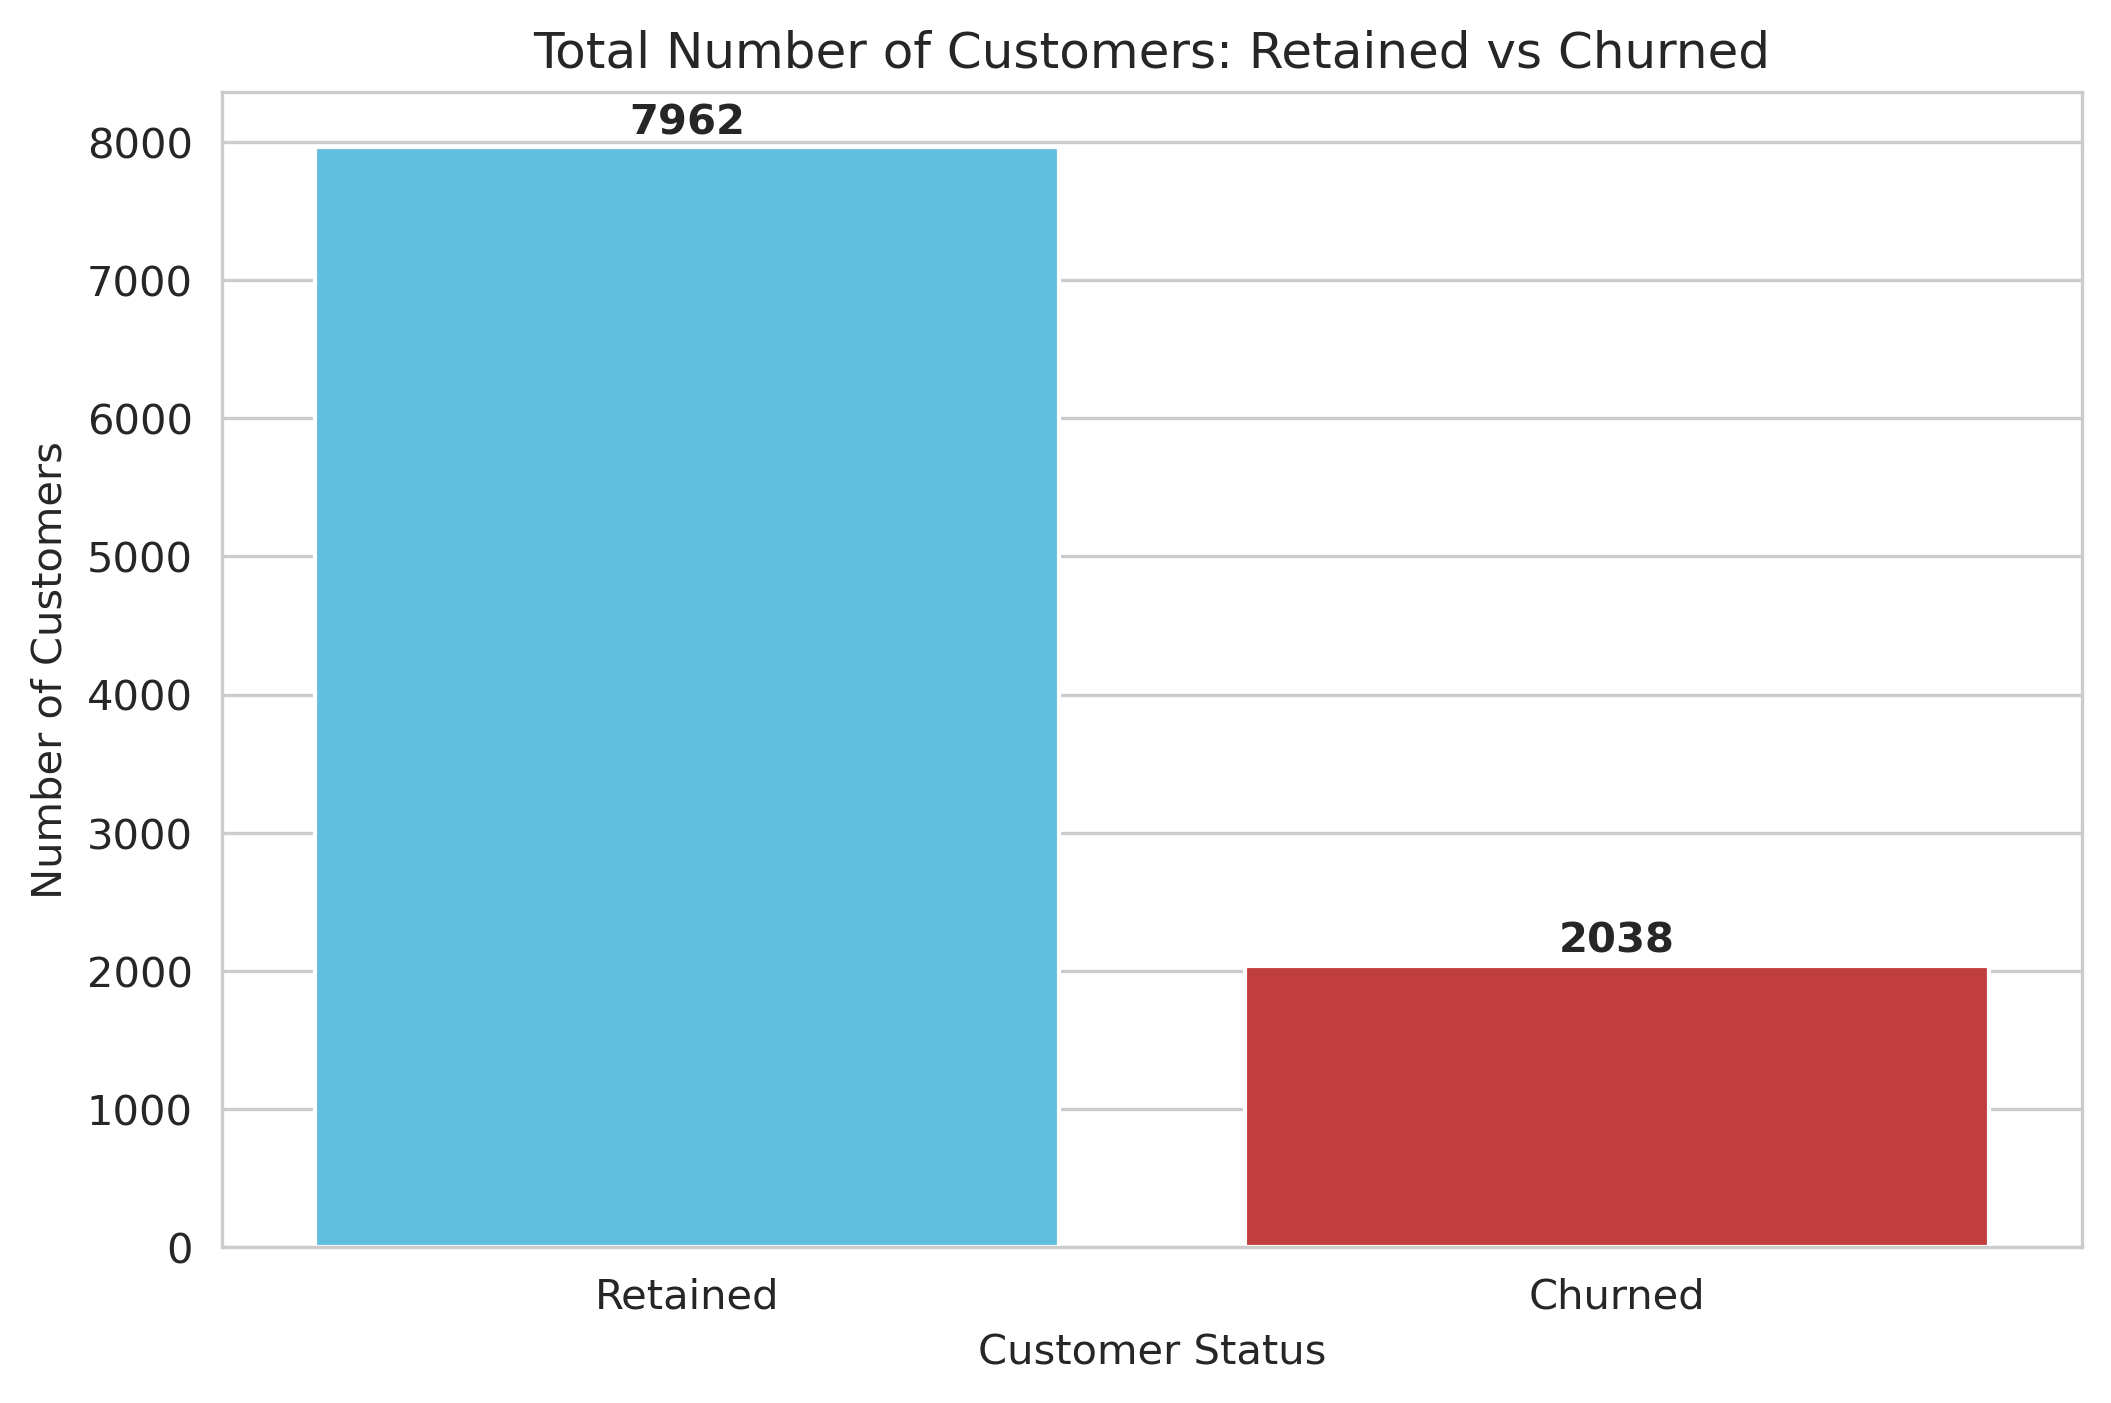

In [39]:
# map 'Exited' values to 'Retained' and 'Churned'
df['Customer Status'] = df['Exited'].map({0: 'Retained', 1: 'Churned'})

# Count values
churn_counts = df['Customer Status'].value_counts()

# Bar plot
plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#4CC9F0', '#D62828'])
plt.title('Total Number of Customers: Retained vs Churned')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')

# Add count labels on bars
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.savefig('barplot.png',transparent=True)
plt.show()

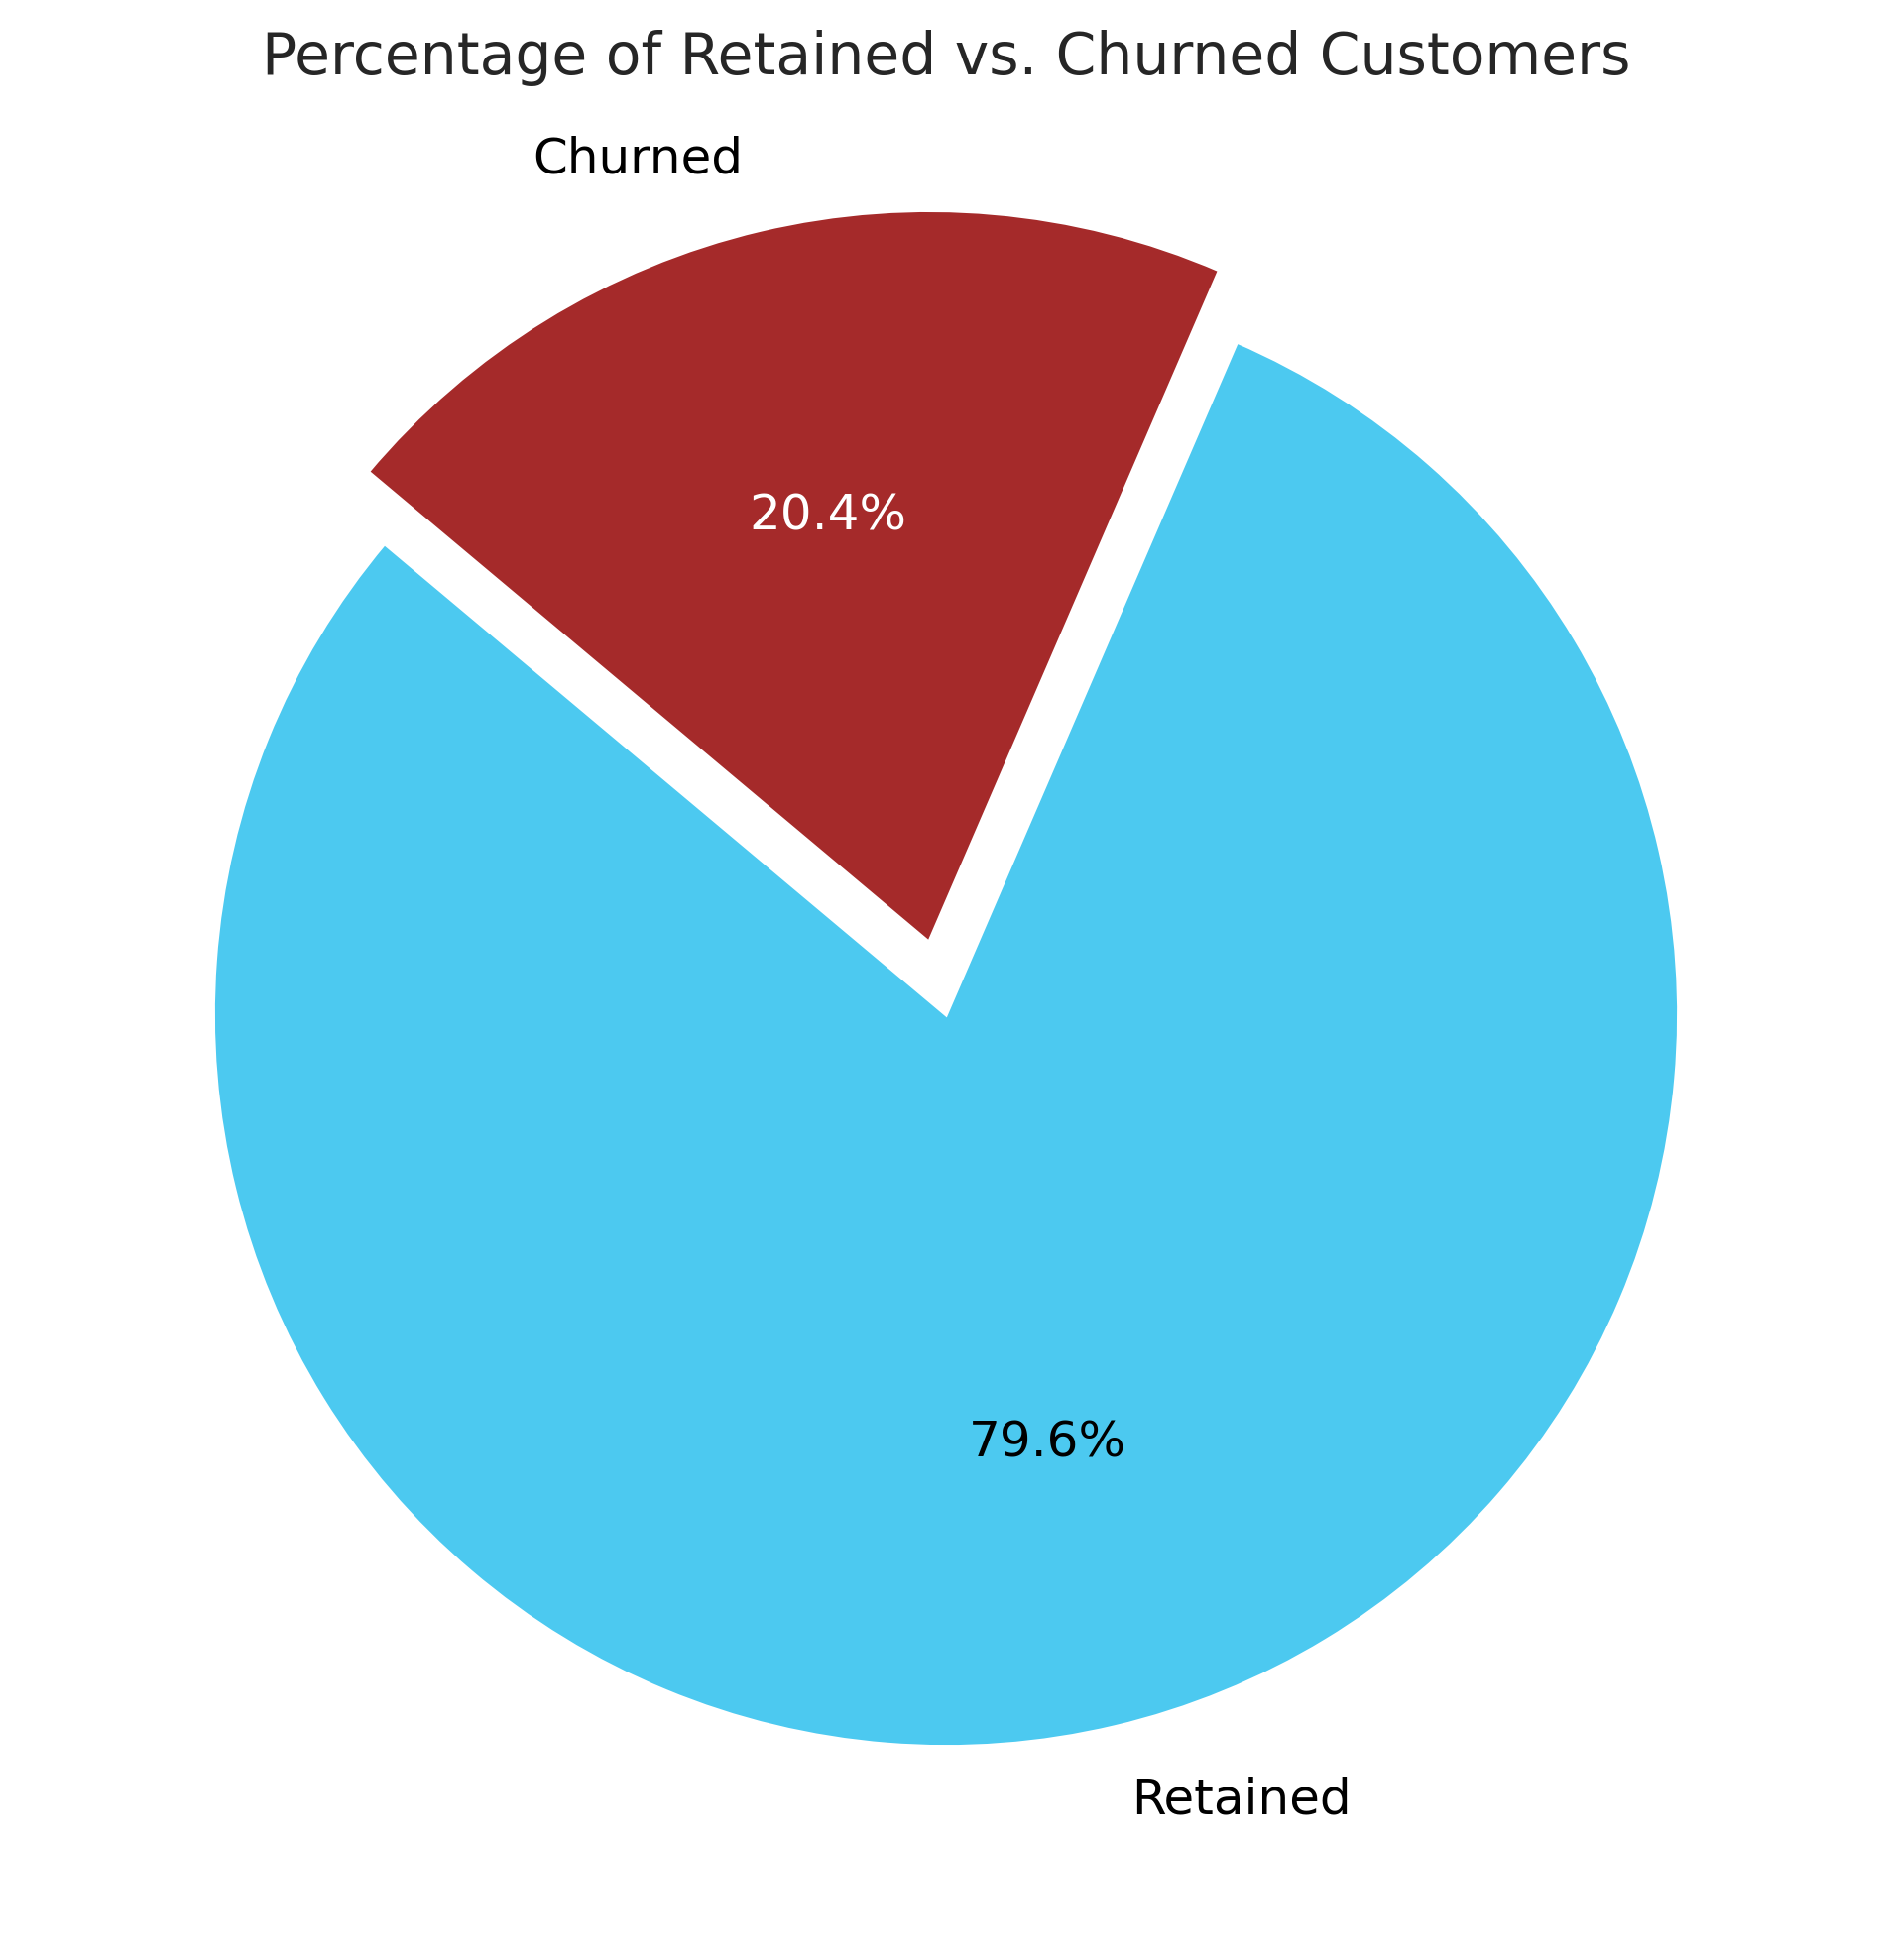

In [40]:
# Count churned and retained customers
churn_counts = df['Exited'].value_counts()
labels = ['Retained', 'Churned']
sizes = churn_counts.values
colors = ['#4CC9F0', '#A52A2A']  # Bright blue and soft maroon
explode = (0, 0.1)  # Slightly explode the Churned slice for emphasis

# Pie chart
plt.figure(figsize=(8, 8), dpi=300)
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=140,
    textprops={'fontsize': 12, 'color': 'black'}  # default text color
)

# Change text color to white for Churned section (maroon)
for i, autotext in enumerate(autotexts):
    if labels[i] == 'Churned':  # Change text color if it's Churned
        autotext.set_color('white')

plt.title('Percentage of Retained vs. Churned Customers', fontsize=14)
plt.savefig('piechart.png', transparent=True)
plt.show()

In [41]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Point Earned']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1000.000000


In [42]:
def categorize_credit_score(score):
    if score <= 500:
        return "Low Credit Score"
    elif score <= 600:
        return "Below Average / Subprime"
    elif score <= 700:
        return "Average"
    elif score <= 800:
        return "Good Credit Score"
    else:
        return "Excellent / Elite Group"

def categorize_age(age):
    if age <= 30:
        return "Young Adults"
    elif age <= 40:
        return "Early Career / Mid-Life"
    elif age <= 50:
        return "Established Adults"
    elif age <= 60:
        return "Pre-Retirement"
    elif age <= 70:
        return "Early Retirees"
    else:
        return "Seniors"

def categorize_tenure(tenure):
    if tenure <= 2:
        return "New Customers"
    elif tenure <= 5:
        return "Emerging Loyalty"
    elif tenure <= 7:
        return "Established Customers"
    else:
        return "Long-Term Customers"

def categorize_balance(balance):
    if balance == 0:
        return "No Savings"
    elif balance <= 50000:
        return "Low Balance"
    elif balance <= 100000:
        return "Moderate Balance"
    elif balance <= 150000:
        return "High Balance"
    else:
        return "Very High Balance"

def categorize_num_of_products(products):
    if products == 1:
        return "Basic Users"
    elif products == 2:
        return "Moderate Users"
    elif products == 3:
        return "Engaged Users"
    else:
        return "Highly Engaged Users"

def categorize_points(points):
    if points < 400:
        return "Low Loyalty"
    elif points < 600:
        return "Moderate Loyalty"
    elif points < 800:
        return "High Loyalty"
    else:
        return "Very High Loyalty"

df["CreditScoreCategory"] = df["CreditScore"].apply(categorize_credit_score)
df["AgeCategory"] = df["Age"].apply(categorize_age)
df["TenureCategory"] = df["Tenure"].apply(categorize_tenure)
df["BalanceCategory"] = df["Balance"].apply(categorize_balance)
df["NumOfProductsCategory"] = df["NumOfProducts"].apply(categorize_num_of_products)
df["PointCategory"] = df["Point Earned"].apply(categorize_points)

In [43]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Satisfaction Score,Card Type,Point Earned,Customer Status,CreditScoreCategory,AgeCategory,TenureCategory,BalanceCategory,NumOfProductsCategory,PointCategory
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,2,DIAMOND,464,Churned,Average,Established Adults,New Customers,No Savings,Basic Users,Moderate Loyalty
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,3,DIAMOND,456,Retained,Average,Established Adults,New Customers,Moderate Balance,Basic Users,Moderate Loyalty
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,3,DIAMOND,377,Churned,Below Average / Subprime,Established Adults,Long-Term Customers,Very High Balance,Engaged Users,Low Loyalty
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,5,GOLD,350,Retained,Average,Early Career / Mid-Life,New Customers,No Savings,Moderate Users,Low Loyalty
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,5,GOLD,425,Retained,Excellent / Elite Group,Established Adults,New Customers,High Balance,Basic Users,Moderate Loyalty


In [44]:
category_orders = {
    "CreditScoreCategory": [
        "Low Credit Score", "Below Average / Subprime", "Average", 
        "Good Credit Score", "Excellent / Elite Group"
    ],
    "AgeCategory": [
        "Young Adults", "Early Career / Mid-Life", "Established Adults", 
        "Pre-Retirement", "Early Retirees", "Seniors"
    ],
    "TenureCategory": [
        "New Customers", "Emerging Loyalty", "Established Customers", "Long-Term Customers"
    ],
    "BalanceCategory": [
        "No Savings", "Low Balance", "Moderate Balance", "High Balance", "Very High Balance"
    ],
    "NumOfProductsCategory": [
        "Basic Users", "Moderate Users", "Engaged Users", "Highly Engaged Users"
    ],
    "PointCategory": [
        "Low Loyalty", "Moderate Loyalty", "High Loyalty", "Very High Loyalty"
    ]
}

for col, order in category_orders.items():
    df[col] = pd.Categorical(df[col], categories=order, ordered=True)

<Figure size 800x600 with 0 Axes>

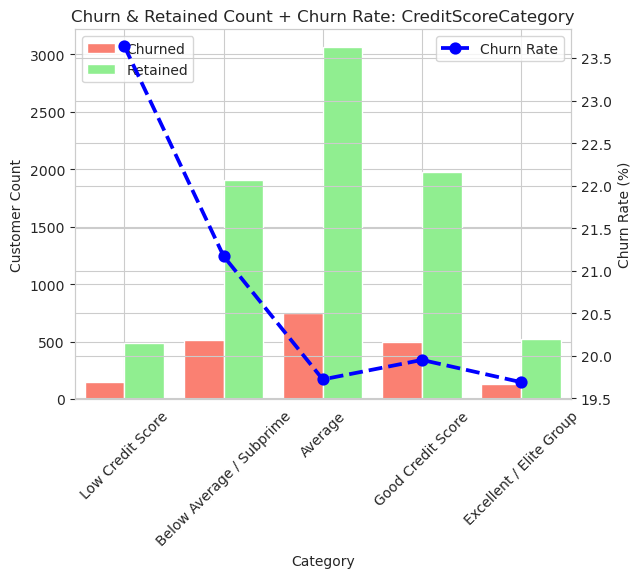

Press Enter to generate the next visualization for CreditScoreCategory...
 


<Figure size 800x600 with 0 Axes>

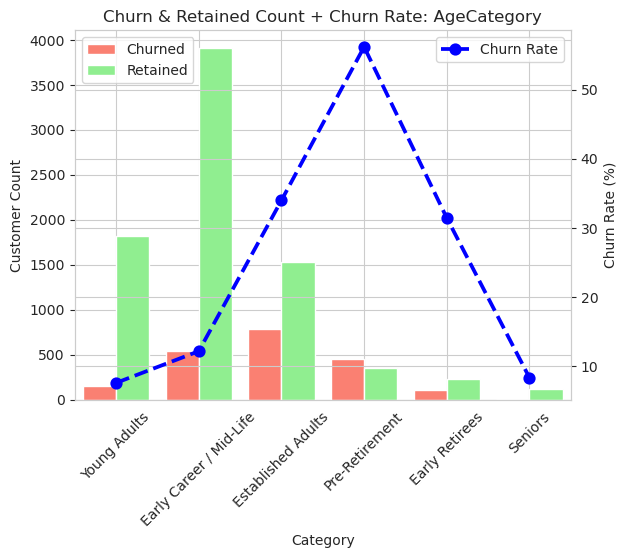

Press Enter to generate the next visualization for AgeCategory...
 


<Figure size 800x600 with 0 Axes>

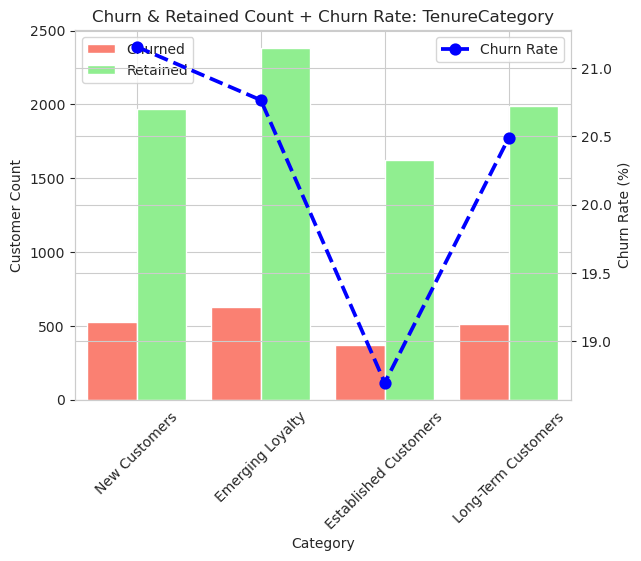

Press Enter to generate the next visualization for TenureCategory...
 


<Figure size 800x600 with 0 Axes>

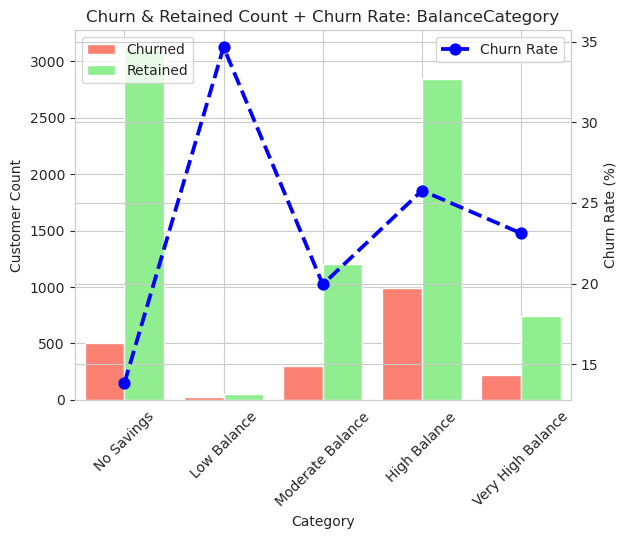

Press Enter to generate the next visualization for BalanceCategory...
 


<Figure size 800x600 with 0 Axes>

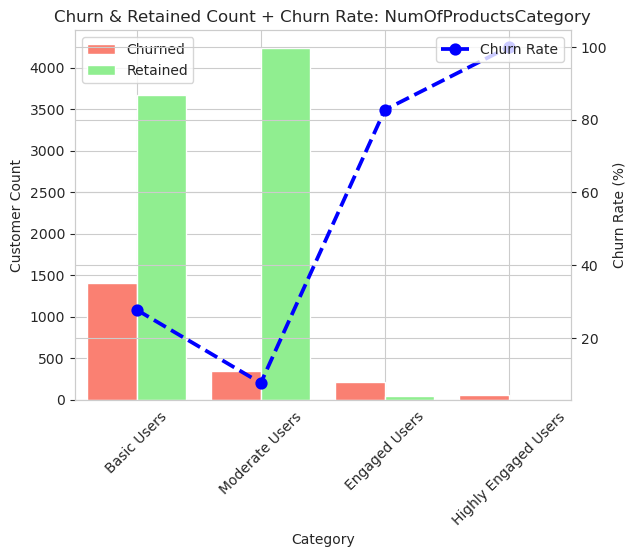

Press Enter to generate the next visualization for NumOfProductsCategory...
 


<Figure size 800x600 with 0 Axes>

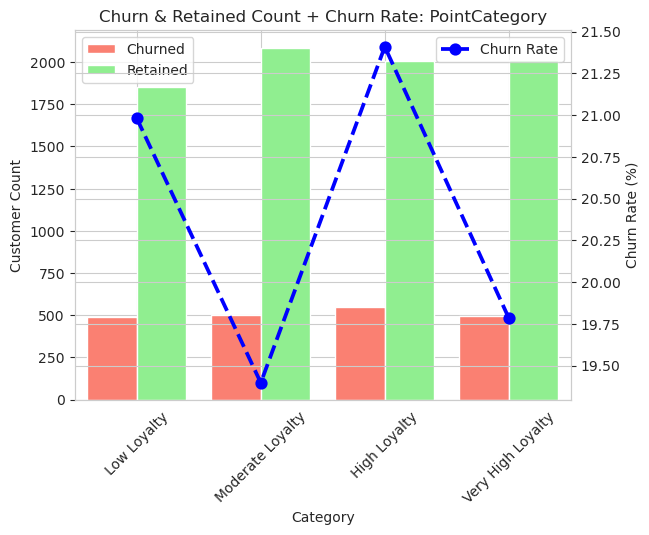

Press Enter to generate the next visualization for PointCategory...
 


In [45]:
# Set visualization style
sns.set_style("whitegrid")

# List of categorical columns
categorical_columns = [
    "CreditScoreCategory", "AgeCategory", "TenureCategory", 
    "BalanceCategory", "NumOfProductsCategory", "PointCategory"
]

# Loop through each categorical column to create and save individual plots
for column in categorical_columns:
    plt.figure(figsize=(8, 6))

    # Compute churned & retained counts per category
    churned_counts = df[df["Exited"] == 1][column].value_counts().sort_index()
    retained_counts = df[df["Exited"] == 0][column].value_counts().sort_index()

    # Compute churn rate (%)
    total_counts = df[column].value_counts().sort_index()
    churn_rate = (churned_counts / total_counts) * 100

    # Merge for aligned categories
    combined_df = pd.DataFrame({"Churned": churned_counts, "Retained": retained_counts}).fillna(0)

    # Plot churned and retained counts as grouped bars
    ax1 = combined_df.plot(kind="bar", color=["salmon", "lightgreen"], width=0.8)
    ax1.set_ylabel("Customer Count")
    ax1.set_xlabel("Category")
    ax1.set_title(f"Churn & Retained Count + Churn Rate: {column}")
    ax1.tick_params(axis="x", rotation=45)

    # Create a second Y-axis for churn rate
    ax2 = ax1.twinx()
    sns.pointplot(x=churn_rate.index, y=churn_rate.values, ax=ax2, color="blue", label="Churn Rate", markers="o", linestyles="--")
    ax2.set_ylabel("Churn Rate (%)")

    # Add legends
    ax1.legend(["Churned", "Retained"], loc="upper left")
    ax2.legend(["Churn Rate"], loc="upper right")

    # Save each figure separately
    plt.savefig(f"{column}_churn_analysis.png", bbox_inches="tight")  # Saves as an image
    plt.show()  # Displays the figure before moving to the next one

    # Ask users for input to continue
    input(f"Press Enter to generate the next visualization for {column}...\n")

<Figure size 800x600 with 0 Axes>

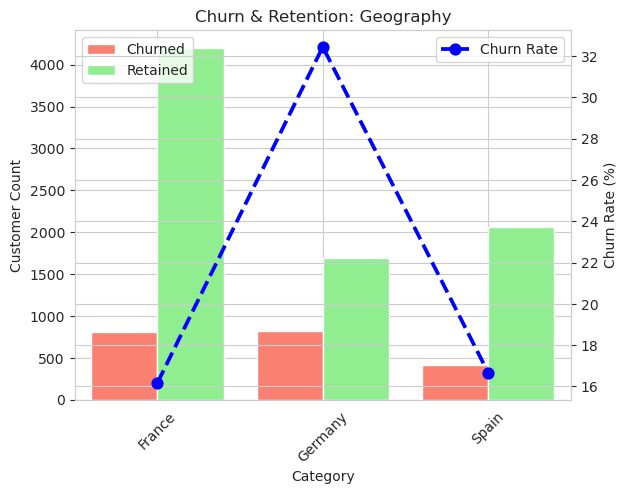


Press Enter to generate the visualization for Geography... 


<Figure size 800x600 with 0 Axes>

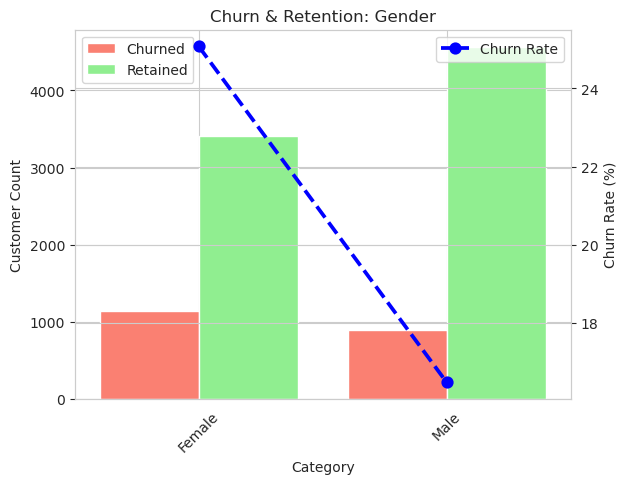


Press Enter to generate the visualization for Gender... 


<Figure size 800x600 with 0 Axes>

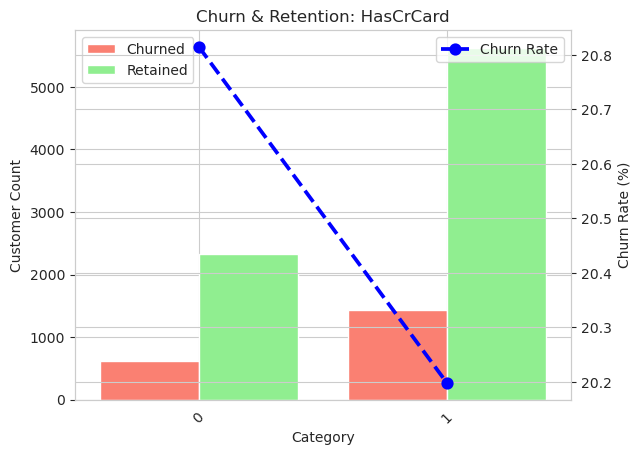


Press Enter to generate the visualization for HasCrCard... 


<Figure size 800x600 with 0 Axes>

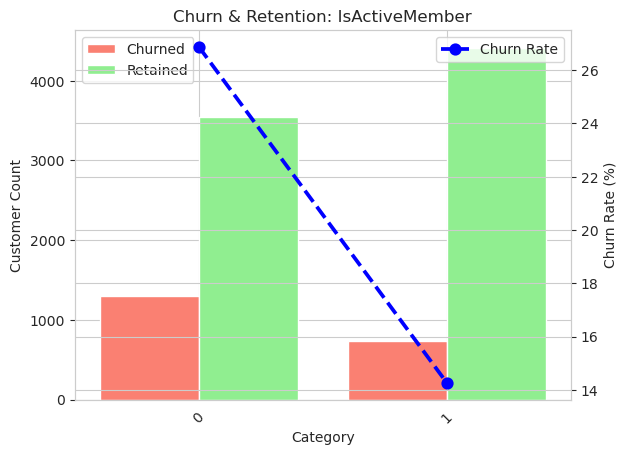


Press Enter to generate the visualization for IsActiveMember... 


<Figure size 800x600 with 0 Axes>

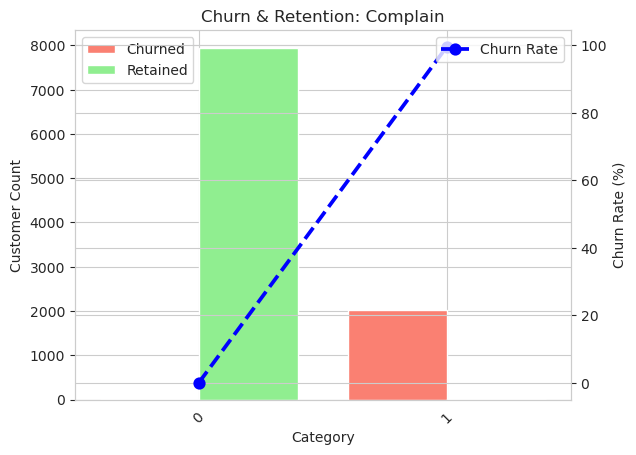


Press Enter to generate the visualization for Complain... 


<Figure size 800x600 with 0 Axes>

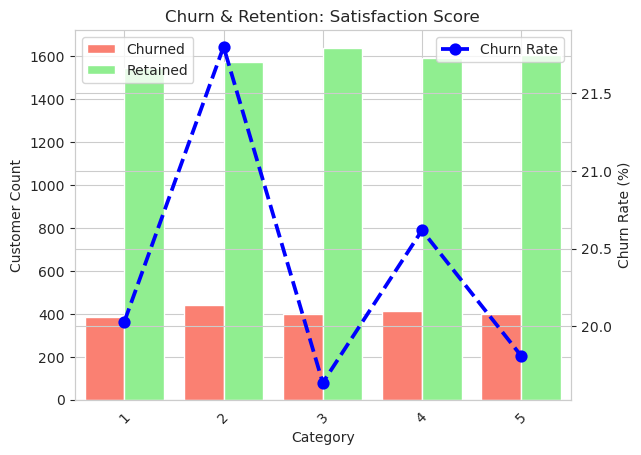


Press Enter to generate the visualization for Satisfaction Score... 


<Figure size 800x600 with 0 Axes>

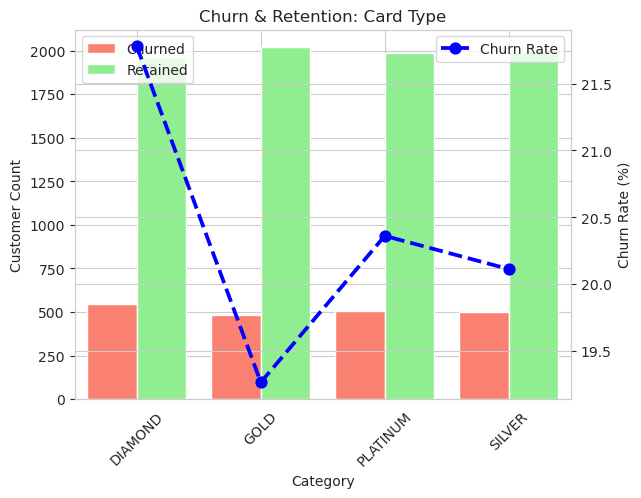


Press Enter to generate the visualization for Card Type... 


In [46]:
# Set visualization style
sns.set_style("whitegrid")

# List of categorical columns
categorical_columns = [
    "Geography", "Gender", "HasCrCard", "IsActiveMember", 
    "Complain", "Satisfaction Score", "Card Type"
]

# Loop through each categorical column to generate separate plots
for column in categorical_columns:
    plt.figure(figsize=(8, 6))

    # Compute churned & retained counts per category
    churned_counts = df[df["Exited"] == 1][column].value_counts().sort_index()
    retained_counts = df[df["Exited"] == 0][column].value_counts().sort_index()
    
    # Compute churn rate (%)
    total_counts = df[column].value_counts().sort_index()
    churn_rate = (churned_counts / total_counts) * 100

    # Merge for aligned categories
    combined_df = pd.DataFrame({"Churned": churned_counts, "Retained": retained_counts}).fillna(0)

    # Plot churned and retained counts as grouped bars
    ax1 = combined_df.plot(kind="bar", color=["salmon", "lightgreen"], width=0.8)
    ax1.set_ylabel("Customer Count")
    ax1.set_xlabel("Category")
    ax1.set_title(f"Churn & Retention: {column}")
    ax1.tick_params(axis="x", rotation=45)

    # Create a second Y-axis for churn rate
    ax2 = ax1.twinx()
    sns.pointplot(x=churn_rate.index, y=churn_rate.values, ax=ax2, color="blue", markers="o", linestyles="--")
    ax2.set_ylabel("Churn Rate (%)")

    # Add legends
    ax1.legend(["Churned", "Retained"], loc="upper left")
    ax2.legend(["Churn Rate"], loc="upper right")
     
    plt.savefig(f"{column}_churn_analysis.png", bbox_inches="tight") # Save each figure separately as an image
    plt.show()

    # Ask users for input to continue
    input(f"\nPress Enter to generate the visualization for {column}...")

In [47]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [48]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Satisfaction Score,Card Type,Point Earned,Customer Status,CreditScoreCategory,AgeCategory,TenureCategory,BalanceCategory,NumOfProductsCategory,PointCategory
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,2,DIAMOND,464,Churned,Average,Established Adults,New Customers,No Savings,Basic Users,Moderate Loyalty
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,3,DIAMOND,456,Retained,Average,Established Adults,New Customers,Moderate Balance,Basic Users,Moderate Loyalty
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,3,DIAMOND,377,Churned,Below Average / Subprime,Established Adults,Long-Term Customers,Very High Balance,Engaged Users,Low Loyalty
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,5,GOLD,350,Retained,Average,Early Career / Mid-Life,New Customers,No Savings,Moderate Users,Low Loyalty
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,5,GOLD,425,Retained,Excellent / Elite Group,Established Adults,New Customers,High Balance,Basic Users,Moderate Loyalty


## 5. Encoding

### Drop the Unused Columns

In [49]:
# List of columns used only for visualization
viz_columns = [
    "Customer Status",
    "CreditScoreCategory",
    "AgeCategory",
    "TenureCategory",
    "BalanceCategory",
    "NumOfProductsCategory",
    "PointCategory"
]

# Drop those columns from the dataframe
df = df.drop(columns=viz_columns)

In [50]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [51]:
# One-Hot Encoding for nominal categorical features
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'])

In [52]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,False,False,True,True,False,False,True,False,False


## 6. Train-Test Split

In [53]:
# Separate features (X) and target (y)
X = df_encoded.drop(columns=['Exited'])  # features
y = df_encoded['Exited']                 # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 20)
Test shape: (2000, 20)


## 7. Build the Model

### Train the Random Forest Model

In [54]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make Predictions and Evaluate Performance

In [55]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1591    1]
 [   2  406]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000




Feature Importances:
               Feature  Importance
8             Complain    0.795856
1                  Age    0.065533
4        NumOfProducts    0.047763
3              Balance    0.015201
6       IsActiveMember    0.012685
12   Geography_Germany    0.010424
0          CreditScore    0.010176
7      EstimatedSalary    0.009368
10        Point Earned    0.009349
2               Tenure    0.005739
9   Satisfaction Score    0.003272
15         Gender_Male    0.002751
11    Geography_France    0.002405
14       Gender_Female    0.002168
13     Geography_Spain    0.001433
5            HasCrCard    0.001418
17      Card Type_GOLD    0.001262
18  Card Type_PLATINUM    0.001220
19    Card Type_SILVER    0.001010
16   Card Type_DIAMOND    0.000967


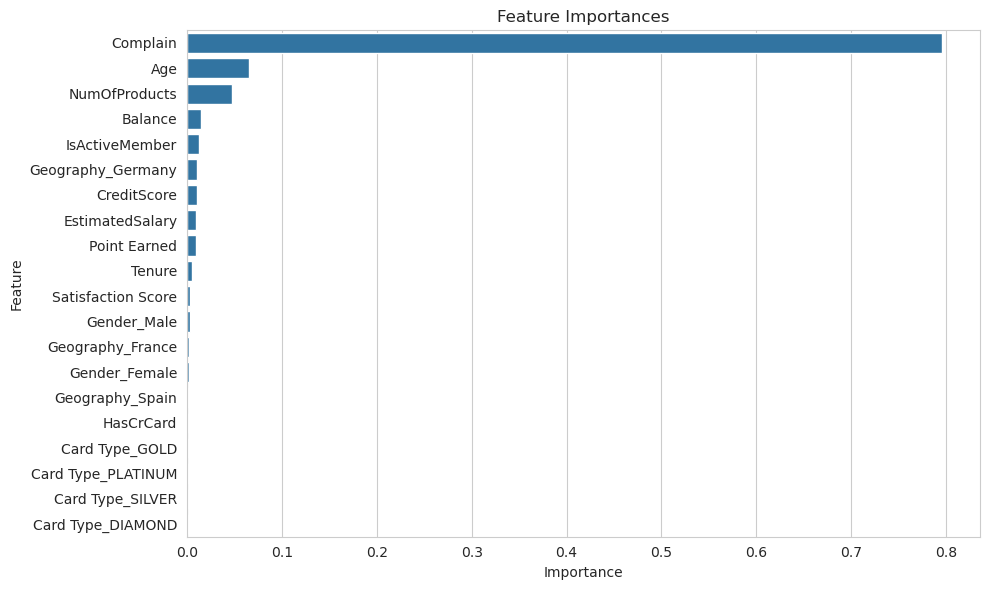

In [56]:
# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print table
print("\nFeature Importances:")
print(feature_importances)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.tight_layout()
plt.savefig('importances.png',transparent=True)
plt.show()

## 8. Drop "Complain" then Retrain the Model

In [57]:
# Drop the 'Complain' feature
X = df_encoded.drop(columns=['Exited', 'Complain'])  # Removed both target and leakage feature
y = df_encoded['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1547   45]
 [ 216  192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1592
           1       0.81      0.47      0.60       408

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



### Final Feature Importances


Feature Importances after Dropping Complain:
               Feature  Importance
1                  Age    0.207792
4        NumOfProducts    0.116697
3              Balance    0.106303
0          CreditScore    0.103117
7      EstimatedSalary    0.102909
9         Point Earned    0.101053
2               Tenure    0.062467
8   Satisfaction Score    0.041725
6       IsActiveMember    0.033637
11   Geography_Germany    0.022302
5            HasCrCard    0.015534
18    Card Type_SILVER    0.012086
15   Card Type_DIAMOND    0.011957
17  Card Type_PLATINUM    0.011910
16      Card Type_GOLD    0.011524
10    Geography_France    0.011061
14         Gender_Male    0.009559
12     Geography_Spain    0.009299
13       Gender_Female    0.009069


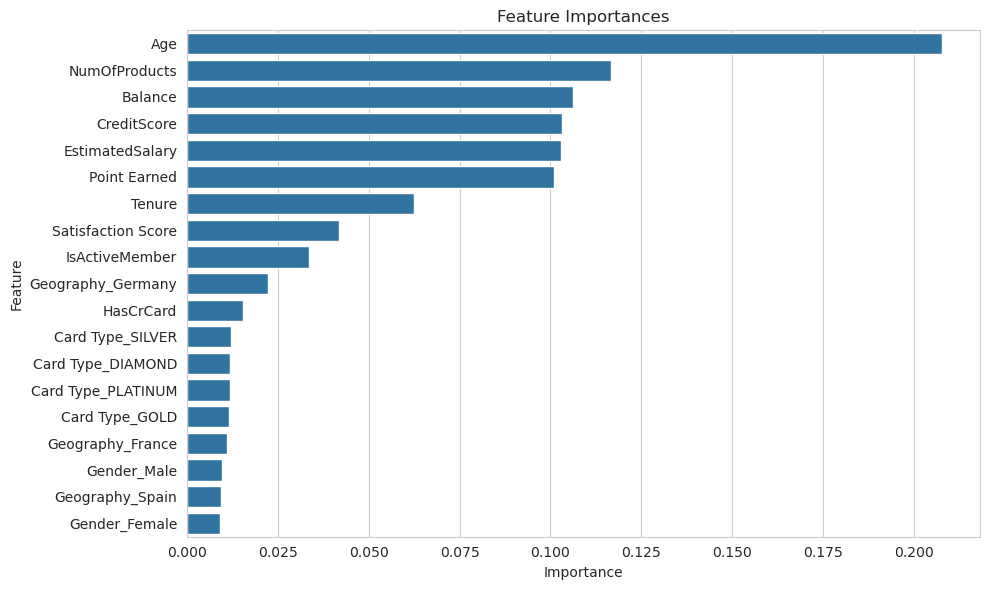

In [60]:
# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print table
print("\nFeature Importances after Dropping Complain:")
print(feature_importances)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.tight_layout()
plt.savefig('importances2.png',transparent=True)
plt.show()